#Setup

Essa seção transforma vídeos já processados pela whisper em um dataframe contendo a frase, o memnto em que ela começou a ser dita e terminou de ser dita no vídeo, a emoção atribuída à frase e a confiança dessa atribuição

##Bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np

##Baixando dados e traduzindo para o ingles(língua usada no modelo de classificação de emoções)

In [ ]:
!pip install webvtt-py
!pip install --upgrade --no-cache-dir gdown
import webvtt
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=395e4ae4e8d79780511d8e1faa21ef1311962dba1daeb1c79d60d654f43109e0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


###Gerar/escolher novo vtt para novo video

##Usando vtt ja gerado

In [ ]:
#Pasta contendo todos os vídeos após o whisper ter sido aplicado para gerar um arquivo vtt

url = "https://drive.google.com/file/d/1QcvEtCXfF-jltGbD3AzqVooSrCIxLVHV/view?usp=drive_link"
output = "videos_vtt.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

!unzip videos_vtt.zip

Downloading...
From: https://drive.google.com/uc?id=1QcvEtCXfF-jltGbD3AzqVooSrCIxLVHV
To: /content/videos_vtt.zip
100%|██████████| 495k/495k [00:00<00:00, 29.1MB/s]

Archive:  videos_vtt.zip
  inflating: 1bdU86705yw.vtt         
  inflating: 7W_NKKjUxyY.vtt         
  inflating: 8aSgYKEuiUI.vtt         
  inflating: C7vg-vfdGxo.vtt         
  inflating: EAcPf_JhR_4.vtt         
  inflating: Gze7DS6HQeU.vtt         
  inflating: nCPO__rTdnM.vtt         
  inflating: O_2eBh9c9Cc.vtt         
  inflating: OU1RXybBOhw.vtt         
  inflating: U6xDHjw-QoE.vtt         
  inflating: uznmdTnRJ5o.vtt         
  inflating: w3EyLFJaII8.vtt         
  inflating: Z0IQv9BDfSE.vtt         
  inflating: zbiXSNOIafs.vtt         


In [ ]:
#Para selecionar um, basta trocar o nome do arquivo abaixo
nome_do_arquivo = "Z0IQv9BDfSE.vtt"
L = []
for caption in webvtt.read(nome_do_arquivo):
  L.append([caption.start,caption.end,str(caption.text)])

df_transcript = pd.DataFrame(L)
df_transcript

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
4   00:00:42.285  00:00:43.806   
..           ...           ...   
64  00:04:33.612  00:04:35.473   
65  00:04:35.473  00:04:35.954   
66  00:04:40.175  00:04:43.118   
67  00:04:43.118  00:04:52.327   
68  00:04:52.327  00:04:59.233   

                                                    2  
0   Eu queria que a gente começasse que você me di...  
1                 Meu nome é Antônio Rodrigues Filho.  
2   Eu nasci na cidade de São Paulo, na zona leste...  
3   Eu falei assim, não, essa paese realmente me m...  
4                                    A minha própria.  
..                                                ...  
64                               Isso foi em que ano?  
65                                Isso daqui em 1990.  
66  que eu voltei da França, que eu vi isso lá, en...  
67  Eu vi que estava surgindo esse movimento music...  
68  Então eu fui um dos pioneiros do reggae a faze...  

[69 rows x 3 columns]

###Utilizar vtt ja gerado anteriormente

In [ ]:
#Um dos arquivos vtt presentes no zip. Esse foi usado para gerar o exemplo abaixo

url = "https://drive.google.com/file/d/1D8H6BgUxzfyHYMymZDZOM-0bzJsvmJ9m/view?usp=drive_link"
output = "emotions.vtt"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1D8H6BgUxzfyHYMymZDZOM-0bzJsvmJ9m
To: /content/emotions.vtt
100%|██████████| 214k/214k [00:00<00:00, 92.8MB/s]


'emotions.vtt'

In [ ]:
"""
  Leitura do vtt e conversão em um dataframe , sendo a coluna 0 o momento do vídeo em que a frase foi dita,
  a coluna 1 o momento em que a frase terminou de ser dita e a coluna 2 a frase em si
"""
import webvtt

L = []
for caption in webvtt.read('emotions.vtt'):
  L.append([caption.start,caption.end,str(caption.text)])

df_transcript = pd.DataFrame(L)
df_transcript

0             1  \
0     00:00:00.000  00:00:22.560   
1     00:00:22.560  00:00:25.960   
2     00:00:25.960  00:00:32.960   
3     00:00:32.960  00:00:34.320   
4     00:00:34.320  00:00:38.320   
...            ...           ...   
2678  02:41:01.160  02:41:03.160   
2679  02:41:03.160  02:41:08.160   
2680  02:41:08.160  02:41:14.160   
2681  02:41:14.160  02:41:17.160   
2682  02:41:17.160  02:41:31.160   

                                                      2  
0     Eu queria que a gente começasse, que você me d...  
1                           e a data do seu nascimento.  
2     Meu nome é Antônio Rodrigues Filho, eu nasci n...  
3                                               cidade.  
4                   Eu nasci no dia 9 de junho de 1955.  
...                                                 ...  
2678                  E que não é, e que não está sendo  
2679  Então agradeço a vocês a oportunidade e admiro...  
2680  E vou tentar conhecer as histórias de outras p...  
2681                       Porque eu sou fã das pessoas  
2682                                    Valeu, obrigado  

[2683 rows x 3 columns]

###Tradução para o inglês

In [ ]:
"""
  Instalando um tradutor para o português elaborado pela Unicamp
  Link para o hugging face deles https://huggingface.co/unicamp-dl/translation-pt-en-t5
"""
!pip install transformers
!git clone https://github.com/unicamp-dl/Lite-T5-Translation.git
!pip install -r Lite-T5-Translation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'Lite-T5-Translation' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")

model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

pten_pipeline = pipeline('text2text-generation', model=model, tokenizer=tokenizer)

pten_pipeline("translate Portuguese to English: Eu gosto de comer arroz.")

[{'generated_text': 'I like to eat rice.'}]

In [ ]:
#Funcao utilizada para gerar uma coluna de strings no Dataframe contendo cada frase traduzida para o inglês
def Traduz(frase):
  traducao = pten_pipeline(frase)
  traducao = list(traducao[0].values())
  return traducao[0]

In [ ]:
df_transcript['Translation'] = list(df_transcript[2].apply(Traduz))
df_transcript

KeyboardInterrupt: ignored

##Extraindo labels de emocoes das frases em inglês

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
  Aqui utilizo um modelo já treinado para a classificação de emoções em inglês, o
  Goemotions. Mais informações sobre ele podem ser encontradas no link abaixo
  https://ai.googleblog.com/2021/10/goemotions-dataset-for-fine-grained.html
"""
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("bhadresh-savani/bert-base-go-emotion")
model = TFRobertaForSequenceClassification.from_pretrained("bhadresh-savani/bert-base-go-emotion",from_pt=True)

emotion = pipeline('sentiment-analysis',
                    model="bhadresh-savani/bert-base-go-emotion",
                    return_all_scores=True)

In [ ]:
#Função para extrair do dicionario retornado pelo goemotions a emoção mais provável e sua probabilidade
def Emocao_provavel(frase):
  emotion_labels = emotion(frase)

  max = emotion_labels[0][0]["score"]
  emocao = emotion_labels[0][0]["label"]

  for dict in emotion_labels[0]:
    if dict["score"] > max:
      max = dict["score"]
      emocao = dict["label"]

  return emocao, max

In [ ]:
#Aplico a função acima em todas as linhas, obtendo uma emoção mais provável para cada frase e o score dela
resp = list(df_transcript['Translation'].apply(Emocao_provavel))
temp = pd.DataFrame.from_records(resp, columns=['label', 'prob'])

df_transcript = pd.concat([df_transcript, temp], axis=1)
df_transcript

0             1  \
0     00:00:00.000  00:00:22.560   
1     00:00:22.560  00:00:25.960   
2     00:00:25.960  00:00:32.960   
3     00:00:32.960  00:00:34.320   
4     00:00:34.320  00:00:38.320   
...            ...           ...   
2678  02:41:01.160  02:41:03.160   
2679  02:41:03.160  02:41:08.160   
2680  02:41:08.160  02:41:14.160   
2681  02:41:14.160  02:41:17.160   
2682  02:41:17.160  02:41:31.160   

                                                      2  \
0     Eu queria que a gente começasse, que você me d...   
1                           e a data do seu nascimento.   
2     Meu nome é Antônio Rodrigues Filho, eu nasci n...   
3                                               cidade.   
4                   Eu nasci no dia 9 de junho de 1955.   
...                                                 ...   
2678                  E que não é, e que não está sendo   
2679  Então agradeço a vocês a oportunidade e admiro...   
2680  E vou tentar conhecer as histórias de outras p...   
2681                       Porque eu sou fã das pessoas   
2682                                    Valeu, obrigado   

                                            Translation        label      prob  
0        I wanted us to start, you told me your full na       desire  0.476099  
1       The date of birth and the date of birth are des      neutral  0.863358  
2     My name is Antônio Rodrigues Filho, I was born...     approval  0.213935  
3                                   The city is a city.      neutral  0.514271  
4                           I was born on June 9, 1955.      neutral  0.834418  
...                                                 ...          ...       ...  
2678       And that it is not, and that it is not being  disapproval  0.474887  
2679  So I thank you for the opportunity and admire ...    gratitude  0.990129  
2680  I'll try to know the stories of other people that      neutral  0.461476  
2681        Because I am a fan of people because I am a      neutral  0.662598  
2682  Thank you for your thanks, thank you for your ...    gratitude  0.994151  

[2683 rows x 6 columns]

##Salvando o resultado

In [ ]:
#Salvo esse dataframe para facilitar usos futuros
df_transcript.to_pickle('df_transcript_baseline2.pkl')

#Mapa de calor

Essa seção parte de frases já classificadas quanto à emoção, plotando-as em um  arousal valence, com um mapa de calor por cima para auxiliar na compreensão

##Baixar dados ja gerados anteriormente

In [ ]:
#Aqui leio um dataset já tratado, com uma emoção atribuída para cada frase
import gdown
import pandas as pd
#No futuro colocar um zip com todos os datasets já tratados
url = "https://drive.google.com/file/d/17HJl5tPQepVgzOa5hNyR3AuINOcLM5W4/view?usp=drive_link"
output = "df_transcript_baseline.pkl"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=17HJl5tPQepVgzOa5hNyR3AuINOcLM5W4
To: /content/df_transcript_baseline.pkl
100%|██████████| 107k/107k [00:00<00:00, 87.4MB/s]


'df_transcript_baseline.pkl'

In [ ]:
df_transcript = pd.read_pickle('df_transcript_baseline.pkl')
df_transcript

0             1  \
0    00:00:00.000  00:00:02.000   
1    00:00:02.000  00:00:04.000   
2    00:00:04.000  00:00:23.000   
3    00:00:23.000  00:00:24.000   
4    00:00:24.000  00:00:27.000   
..            ...           ...   
748  01:45:42.000  01:46:01.000   
749  01:46:01.000  01:46:21.000   
750  01:46:21.000  01:46:39.000   
751  01:46:39.000  01:46:46.000   
752  01:46:46.000  01:47:07.000   

                                                     2       label      prob  
0                                             Bom dia.  admiration  0.766542  
1                                             Bom dia.  admiration  0.766542  
2    Nós gostaríamos de começar perguntando o seu n...     neutral  0.793600  
3                                          nascimento.     neutral  0.924464  
4                  Eu me chamo Lourdes Alves de Souza.     neutral  0.277567  
..                                                 ...         ...       ...  
748  E eu, de algum modo, gostaria que a minha hist...     neutral  0.348922  
749  Acho que é isso que me motiva, contar a minha ...     neutral  0.509090  
750  Isso me motiva. Também ainda com uma visão de ...     neutral  0.274121  
751  Então, a gente gostaria de agradecer. Luanice,...   gratitude  0.950028  
752  Eu que agradeço. Vocês me receberam bem e me a...     neutral  0.414882  

[753 rows x 5 columns]

##Baixar coordenadas das emoções e adicionando-as ao dataframe

In [ ]:
#Utilizo uma planilha com coordenadas já atribuídas para cada emoção em um gráfico de arousal valence
#Um plano futuro seria usar as embeddings do Bert para auxiliar nesse mapeamento
import gdown
import pandas as pd

url1 = 'https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH'
output = 'emotions_coord.xlsx'
gdown.download(url1, output, quiet=False)
emotions_coord = pd.read_excel(output)

Downloading...
From: https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH
To: /content/emotions_coord.xlsx
100%|██████████| 8.77k/8.77k [00:00<00:00, 6.68MB/s]


In [ ]:
emotions_coord

Emotion     X     Y
0       admiration  0.38 -0.08
1        amusement  0.56  0.19
2            anger -0.41  0.78
3        annoyance -0.45  0.66
4         approval  0.95 -0.17
5           caring  0.76 -0.60
6        confusion -0.57 -0.69
7        curiosity  0.65  0.10
8           desire  0.42  0.65
9   disappointment -0.80 -0.02
10     disapproval -0.68  0.32
11         disgust -0.68  0.49
12   embarrassment -0.32 -0.60
13      excitement  0.70  0.72
14            fear -0.11  0.78
15       gratitude  0.90 -0.30
16           grief -0.90 -0.30
17             joy  0.95  0.13
18            love  0.85 -0.14
19     nervousness -0.68 -0.17
20        optimism  0.32  0.06
21           pride  0.62  0.50
22     realization  0.88  0.36
23          relief  0.71 -0.67
24         remorse -0.41 -0.43
25         sadness -0.82 -0.40
26        surprise  0.42  0.88
27         neutral  0.00  0.00

In [ ]:
#Função que dada uma emoção determina sua coordenada no mapa.

def generate_coord(label):
  index = emotions_coord.loc[emotions_coord['Emotion'] == label].index[0]
  x = emotions_coord.iloc[index]['X']
  y = emotions_coord.iloc[index]['Y']
  return (x,y)

In [ ]:
#Associo cada frase a uma coordenada de caordo com sua emoção
resp = list(df_transcript['label'].apply(generate_coord))
temp = pd.DataFrame.from_records(resp, columns=['x', 'y'])

df_transcript = pd.concat([df_transcript, temp], axis=1)
df_transcript

IndexError: ignored

Aqui também são retiradas as emoções neutras, por serem muito frequentes, prativamente inutilizando o mapa de calor

In [ ]:
df_transcript = df_transcript[df_transcript.label!='neutral']
df_transcript = df_transcript.reset_index(drop=True)
df_transcript

0             1  \
0  00:00:19.748  00:00:27.774   
1  00:00:34.779  00:00:42.285   
2  00:02:05.908  00:02:10.649   
3  00:02:15.733  00:02:18.013   
4  00:03:06.859  00:03:13.847   
5  00:04:07.550  00:04:09.652   
6  00:04:25.925  00:04:29.168   
7  00:04:33.612  00:04:35.473   

                                                   2  \
0  Eu queria que a gente começasse que você me di...   
1  Eu falei assim, não, essa paese realmente me m...   
2  A minha infância foi, assim, com relação a cin...   
3                    Olha só como é que é a moleque.   
4  Mas e nesse sentido tem alguma que tenha te to...   
5       Olha o respeito que existe com o jovem aqui.   
6  Depois, a própria prefeitura deles... De livro...   
7                               Isso foi em que ano?   

                                         Translation        label      prob  \
0  I wanted that we started to tell me the full name       desire  0.419759   
1         I said so, no, this paese really marked me  realization  0.177132   
2  My childhood was, thus, with respect to cinema...   admiration  0.450683   
3                Look at just how is the soft berry.     approval  0.414925   
4   But in this sense there is something that has to     approval  0.473008   
5  Look at the respect that exists with young peo...   admiration  0.657249   
6        Afterwards, their own city hall... books to     approval  0.444192   
7           That was when what year did this happen?    curiosity  0.542039   

      x     y  
0  0.42  0.65  
1  0.88  0.36  
2  0.38 -0.08  
3  0.95 -0.17  
4  0.95 -0.17  
5  0.38 -0.08  
6  0.95 -0.17  
7  0.65  0.10

##Geracao do heatmap

In [ ]:
#HEATMAP
import matplotlib.pyplot as plt
import numpy as np
import math

array_x = df_transcript['x'].to_numpy()
x = array_x.tolist()
array_y = df_transcript['y'].to_numpy()
y = array_y.tolist()

#Definindo tamanho do grid e do raio(h)
grid_size=0.02
h=0.5

#Tomando valores de máximos e mínimos de X e Y.
x_min=-1
x_max=1
y_min=-1
y_max=1

#Construindo grid
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#Determinando ponto central do grid
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

In [ ]:
array_x

array([0.42, 0.88, 0.38, 0.95, 0.95, 0.38, 0.95, 0.65])

In [ ]:
#Função para calcular intensidade com Quartic Kernel
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

In [ ]:
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #Calculando distância
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2)
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #Soma os valores de intensidade
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

##Plotando em cima de uma arousal_valence

Como plotar por cima de uma imagem pre-existente:
https://stackoverflow.com/questions/42481203/heatmap-on-top-of-image

Como definir transparência acima de um limiar para nao perdermos a imagem de background:

https://stackoverflow.com/questions/22669704/correct-way-to-set-color-to-transparent-with-matplotlib-pcolormesh

Como plotar um gráfico em cima
https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point

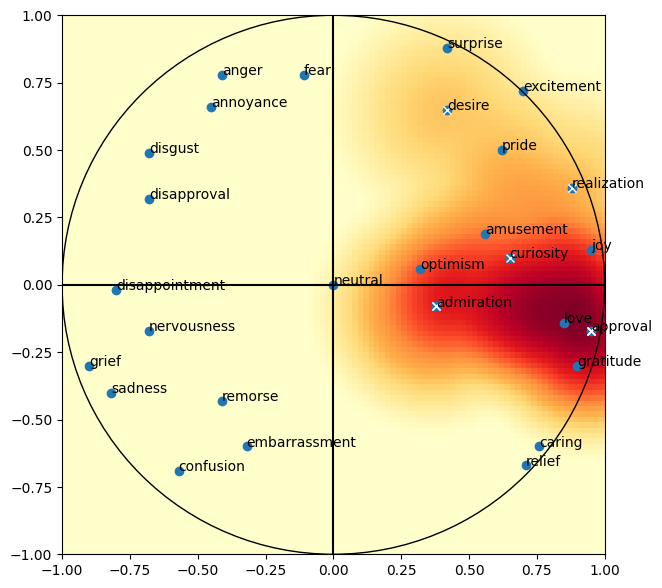

In [ ]:
#Saída do Heatmap
plt.figure(figsize=(7,7))

intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='YlOrRd') #https://matplotlib.org/stable/tutorials/colors/colormaps.html


#fig, ax = plt.subplots()

x_emo = emotions_coord.X.to_list()
y_emo = emotions_coord.Y.to_list()
plt.scatter(x_emo, y_emo)


for i, row in emotions_coord.iterrows():
    plt.annotate(row['Emotion'], (x_emo[i], y_emo[i]))

plt.xlim(-1, 1)
plt.ylim(-1,1)

ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1, color='black', fill=False))
plt.axvline(x = 0, color = 'black', label = 'Arousal')
plt.axhline(y = 0, color = 'black', label = 'Valence')

#plt.colorbar()
plt.plot(x,y,'x',color='white')

#Adicionando funcionalidade audio e experimentando deepface

In [ ]:
#Comecei rodando a parte do pip para ja gerar a transcricao e dai comecei a mexer aqui
df = viemr.dataframe

In [ ]:
df

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
4   00:00:42.285  00:00:43.806   
..           ...           ...   
59  00:04:29.168  00:04:33.612   
60  00:04:33.612  00:04:35.473   
61  00:04:40.175  00:04:43.118   
62  00:04:43.118  00:04:52.327   
63  00:04:52.327  00:04:59.233   

                                                    2  
0   Eu queria que a gente começasse que você me di...  
1                 Meu nome é Antônio Rodrigues Filho.  
2   Eu nasci na cidade de São Paulo, na zona leste...  
3   Eu falei assim, não, essa paese realmente me m...  
4                                    A minha própria.  
..                                                ...  
59  Aí eu comecei a pegar essa fórmula de música p...  
60                               Isso foi em que ano?  
61  que eu voltei da França, que eu vi isso lá, en...  
62  Eu vi que estava surgindo esse movimento music...  
63  Então eu fui um dos pioneiros do reggae a faze...  

[64 rows x 3 columns]

In [ ]:
!git clone https://github.com/m3hrdadfi/soxan

fatal: destination path 'soxan' already exists and is not an empty directory.


In [ ]:
!mv soxan/* .

mv: cannot stat 'soxan/*': No such file or directory


In [ ]:
def speech_file_to_array_fn(path, sampling_rate):
    speech_array, _sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(_sampling_rate, sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech


def predict(path, sampling_rate):
    speech = speech_file_to_array_fn(path, sampling_rate)
    inputs = feature_extractor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)
    inputs = {key: inputs[key].to(device) for key in inputs}

    with torch.no_grad():
        logits = model(**inputs).logits

    scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]
    outputs = [{"Emotion": config.id2label[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in
               enumerate(scores)]
    return outputs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from transformers import AutoConfig, Wav2Vec2FeatureExtractor
from src.models import Wav2Vec2ForSpeechClassification, HubertForSpeechClassification
from moviepy.editor import *

model_name_or_path = "Rajaram1996/Hubert_emotion"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_name_or_path)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name_or_path)
sampling_rate = feature_extractor.sampling_rate

model = HubertForSpeechClassification.from_pretrained(model_name_or_path, output_hidden_states=True).to(device)

In [ ]:
video = VideoFileClip("emotions.mp4")

full_video = r"emotions.mp4"
emot = []
scor = []
maximo = df.shape[0]
i = 0
for i in range(0, maximo):
    #Usando os timestamps da transcricao, corot o audio separando cada frase
    startPos = df[0][i]
    endPos = df[1][i]

    clip = VideoFileClip(full_video).subclip(startPos, endPos)

    part_name = "part_"+str(i)+".mp3"
    clip.audio.write_audiofile(part_name)

    #Aplico o modelo
    temp = predict(part_name,sampling_rate)
    max_values = max(temp, key=lambda x:x['Score'])

    # A cada frase, atribuo a emocao mais provavel e sua probabilidade
    max_emotion = (max_values['Emotion'])
    max_emotion = max_emotion[(max_emotion.find('_')+ 1):]
    if max_emotion == 'sad':
      max_emotion = 'sadness'
    elif max_emotion == 'angry':
      max_emotion = 'anger'
    elif max_emotion == 'happy':
      max_emotion = 'joy'
    emot.append(max_emotion)

    max_score = (max_values['Score'])
    scor.append(float(max_score.replace("%","",1))/ 100)

    print("part ",i,"done")
    os.remove(part_name)
    i += 1
df['label'] = emot
df['prob'] = scor

MoviePy - Writing audio in part_0.mp3


MoviePy - Done.
part  0 done
MoviePy - Writing audio in part_1.mp3


MoviePy - Done.
part  1 done
MoviePy - Writing audio in part_2.mp3


MoviePy - Done.
part  2 done
MoviePy - Writing audio in part_3.mp3


MoviePy - Done.
part  3 done
MoviePy - Writing audio in part_4.mp3


MoviePy - Done.


part  4 done
MoviePy - Writing audio in part_5.mp3


MoviePy - Done.


part  5 done
MoviePy - Writing audio in part_6.mp3


MoviePy - Done.
part  6 done
MoviePy - Writing audio in part_7.mp3


MoviePy - Done.
part  7 done
MoviePy - Writing audio in part_8.mp3


MoviePy - Done.
part  8 done
MoviePy - Writing audio in part_9.mp3


MoviePy - Done.
part  9 done
MoviePy - Writing audio in part_10.mp3


MoviePy - Done.


part  10 done
MoviePy - Writing audio in part_11.mp3


MoviePy - Done.
part  11 done
MoviePy - Writing audio in part_12.mp3


MoviePy - Done.


part  12 done
MoviePy - Writing audio in part_13.mp3


MoviePy - Done.


part  13 done
MoviePy - Writing audio in part_14.mp3


MoviePy - Done.


part  14 done
MoviePy - Writing audio in part_15.mp3


MoviePy - Done.
part  15 done
MoviePy - Writing audio in part_16.mp3


MoviePy - Done.
part  16 done
MoviePy - Writing audio in part_17.mp3


MoviePy - Done.
part  17 done
MoviePy - Writing audio in part_18.mp3


MoviePy - Done.


part  18 done
MoviePy - Writing audio in part_19.mp3


MoviePy - Done.


part  19 done
MoviePy - Writing audio in part_20.mp3


MoviePy - Done.
part  20 done
MoviePy - Writing audio in part_21.mp3


MoviePy - Done.
part  21 done
MoviePy - Writing audio in part_22.mp3


MoviePy - Done.
part  22 done
MoviePy - Writing audio in part_23.mp3


MoviePy - Done.


part  23 done
MoviePy - Writing audio in part_24.mp3


MoviePy - Done.
part  24 done
MoviePy - Writing audio in part_25.mp3


MoviePy - Done.
part  25 done
MoviePy - Writing audio in part_26.mp3


MoviePy - Done.


part  26 done
MoviePy - Writing audio in part_27.mp3


MoviePy - Done.


part  27 done
MoviePy - Writing audio in part_28.mp3


MoviePy - Done.


part  28 done
MoviePy - Writing audio in part_29.mp3


MoviePy - Done.


part  29 done
MoviePy - Writing audio in part_30.mp3


MoviePy - Done.
part  30 done
MoviePy - Writing audio in part_31.mp3


MoviePy - Done.
part  31 done
MoviePy - Writing audio in part_32.mp3


MoviePy - Done.


part  32 done
MoviePy - Writing audio in part_33.mp3


MoviePy - Done.
part  33 done
MoviePy - Writing audio in part_34.mp3


MoviePy - Done.
part  34 done
MoviePy - Writing audio in part_35.mp3


MoviePy - Done.
part  35 done
MoviePy - Writing audio in part_36.mp3


MoviePy - Done.
part  36 done
MoviePy - Writing audio in part_37.mp3


MoviePy - Done.
part  37 done
MoviePy - Writing audio in part_38.mp3


MoviePy - Done.
part  38 done
MoviePy - Writing audio in part_39.mp3


MoviePy - Done.
part  39 done
MoviePy - Writing audio in part_40.mp3


MoviePy - Done.
part  40 done
MoviePy - Writing audio in part_41.mp3


MoviePy - Done.
part  41 done
MoviePy - Writing audio in part_42.mp3


MoviePy - Done.
part  42 done
MoviePy - Writing audio in part_43.mp3


MoviePy - Done.
part  43 done
MoviePy - Writing audio in part_44.mp3


MoviePy - Done.
part  44 done
MoviePy - Writing audio in part_45.mp3


MoviePy - Done.
part  45 done
MoviePy - Writing audio in part_46.mp3


MoviePy - Done.
part  46 done
MoviePy - Writing audio in part_47.mp3


MoviePy - Done.


part  47 done
MoviePy - Writing audio in part_48.mp3


MoviePy - Done.


part  48 done
MoviePy - Writing audio in part_49.mp3


MoviePy - Done.


part  49 done
MoviePy - Writing audio in part_50.mp3


MoviePy - Done.


part  50 done
MoviePy - Writing audio in part_51.mp3


MoviePy - Done.
part  51 done
MoviePy - Writing audio in part_52.mp3


MoviePy - Done.
part  52 done
MoviePy - Writing audio in part_53.mp3


MoviePy - Done.
part  53 done
MoviePy - Writing audio in part_54.mp3


MoviePy - Done.
part  54 done
MoviePy - Writing audio in part_55.mp3


MoviePy - Done.


part  55 done
MoviePy - Writing audio in part_56.mp3


MoviePy - Done.
part  56 done
MoviePy - Writing audio in part_57.mp3


MoviePy - Done.


part  57 done
MoviePy - Writing audio in part_58.mp3


MoviePy - Done.


part  58 done
MoviePy - Writing audio in part_59.mp3


MoviePy - Done.
part  59 done
MoviePy - Writing audio in part_60.mp3


MoviePy - Done.


part  60 done
MoviePy - Writing audio in part_61.mp3


MoviePy - Done.
part  61 done
MoviePy - Writing audio in part_62.mp3


MoviePy - Done.
part  62 done
MoviePy - Writing audio in part_63.mp3


MoviePy - Done.
part  63 done


FileNotFoundError: ignored

In [ ]:
df

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
4   00:00:42.285  00:00:43.806   
..           ...           ...   
59  00:04:29.168  00:04:33.612   
60  00:04:33.612  00:04:35.473   
61  00:04:40.175  00:04:43.118   
62  00:04:43.118  00:04:52.327   
63  00:04:52.327  00:04:59.233   

                                                    2    label   prob  
0   Eu queria que a gente começasse que você me di...  sadness  0.936  
1                 Meu nome é Antônio Rodrigues Filho.  sadness  0.679  
2   Eu nasci na cidade de São Paulo, na zona leste...  sadness  0.963  
3   Eu falei assim, não, essa paese realmente me m...  sadness  0.849  
4                                    A minha própria.  sadness  0.962  
..                                                ...      ...    ...  
59  Aí eu comecei a pegar essa fórmula de música p...      joy  0.899  
60                               Isso foi em que ano?      joy  0.944  
61  que eu voltei da França, que eu vi isso lá, en...  sadness  0.042  
62  Eu vi que estava surgindo esse movimento music...      joy  0.981  
63  Então eu fui um dos pioneiros do reggae a faze...  disgust  0.639  

[64 rows x 5 columns]

Testando deepface

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 700.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=1740593eabddb3e3ba1a29d5f0cb60bac642e7ec4d84b9b9b005bd7552ac06b8
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
#Minha maior esperança é isso funcionar sem precisar de um db, no caso, ainda nao entendi ao certo oq é o db
DeepFace.stream(source = "emotions.mp4")

KeyboardInterrupt: ignored

Isso aqui aparenta funcionar, apenas dá problema quando ele nao reconhece a face. Minha ideia por enquanto é usar o deepface para identificar se tem uma face e só então usar o detector de emoções. Me basear um pouco no stream do deepface para ajustar questões como quantos frames serão analizados e, por fim, utilizar a média das emoções em todos os frames para determinar uma emoção.

In [ ]:
!pip install opencv-python

In [ ]:
#Versao usando o face cascade
import cv2


frames = 5
video = VideoFileClip("emotions.mp4")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#full_video = r"emotions.mp4"
new_clip = video.set_fps(frames)
emot = []
scor = []
maximo = df.shape[0]

for i in range(0, maximo):
    #Usando os timestamps da transcricao, corot o audio separando cada frase
    startPos = df[0][i]
    endPos = df[1][i]

    clip = new_clip.subclip(startPos, endPos)

    #clip = VideoFileClip(full_video).subclip(startPos, endPos)

    frames = clip.iter_frames()

    total = {}

    for frame in frames:

      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      faces = face_cascade.detectMultiScale(gray, 1.1, 4)
      #Se não tiver face, essa função uma tupla vazia

      if(len(faces) > 0):
        objs = DeepFace.analyze(frame, actions = ['emotion'])
        if(total == {}):
          total = objs[0]['emotion']
        else:
          for key, value in objs[0]['emotion'].items():
            total[key] += value
        quant += 1


    for key, value in total.items():
        total[key] = value / quant
    max_prob = max(total.values())
    max_emo = {i for i in total if total[i] == max_prob}

    if max_emo == 'sad':
      max_emo = 'sadness'
    elif max_emo == 'angry':
      max_emo = 'anger'
    elif max_emo == 'happy':
      max_emo = 'joy'

    emot.append(max_emo)
    scor.append(max_prob/quant)

df['label'] = emot
df['prob'] = scor

In [ ]:

video = VideoFileClip("emotions.mp4")

full_video = r"emotions.mp4"
emot = []
scor = []
maximo = df.shape[0]

#Coloquei o range aqui em 3 pq tem uma face
for i in range(0, maximo):
    #Usando os timestamps da transcricao, corot o audio separando cada frase
    startPos = df[0][i]
    endPos = df[1][i]

    clip = VideoFileClip(full_video).subclip(startPos, endPos)

    frames = clip.iter_frames()

    skip = 0
    quant = 0
    total = {}

    for frame in frames:
      if skip != 0:
        skip -= 1
        continue

      try:
        #Se não tiver face, essa função retorna uma excecao
        objs = DeepFace.analyze(frame, actions = ['emotion'])
        if(total == {}):
          total = objs[0]['emotion']
        else:
          for key, value in objs[0]['emotion'].items():
            total[key] += value
        quant += 1
      except ValueError:
        print("Nao tem face")
        skip = 1

    for key, value in total.items():
        total[key] = value / quant
    max_prob = max(total.values())
    max_emo = {i for i in total if total[i] == max_prob}

    break

Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]


Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


Nao tem face


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face
Nao tem face


In [ ]:
total

[{'emotion': {'angry': 35.6081485748291,
   'disgust': 0.01811585680115968,
   'fear': 4.042145609855652,
   'happy': 0.0084609207988251,
   'sad': 51.74070596694946,
   'surprise': 0.07809755625203252,
   'neutral': 8.504324406385422},
  'dominant_emotion': 'sad',
  'region': {'x': 499, 'y': 99, 'w': 265, 'h': 265}}]

In [ ]:
max_emo

{'fear'}

# Parte multimodal via grafos

Primeiro de tudo, rodar a parte de testando funcoes do pip para gerar um datafram com os embeddings e tudo mais

In [ ]:
from sklearn.neighbors import kneighbors_graph
import networkx as nx

In [ ]:
viemr.emotion_recognition(modality="multimodal")

INFO:root:Initialzing the transcription
INFO:root:Loading the translator


INFO:root:Successfully loaded, now applyng
INFO:root:Loading the classifier


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'RobertaTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['bert.encoder.layer.11.attention.self.key.bias', 'bert.encoder.layer.6.attention.self.value.bias', 'bert.encoder.layer.7.attention.self.value.weight', 'bert.encoder.layer.5.attention.output.dense.bias', 'bert.encoder.layer.2.attention.self.value.bias', 'bert.encoder.layer.6.attention.output.dense.bias', 'bert.encoder.layer.7.attention.self.key.bias', 'bert.encoder.layer.9.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.self.value.weight', 'bert.encoder.layer.4.attention.self.key.bias', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.10.attention.self.query.bias', 'bert.encoder.layer.3.attention.self.query.weight', 'bert.encoder.layer.7.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.attention.self.query.bias', 'bert.encoder.layer.9.output.dense.bias', 'bert.encoder.layer.2.output.LayerNorm.weight', 'bert.encoder.layer.9.output.Lay

INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


INFO:root:Successfully loaded, now applying


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:Dataframe emotions classified
INFO:root:Ending the transcription
INFO:root:Initialzing the audio classification


INFO:root:Running the Hubert classification for each phrase


MoviePy - Writing audio in part_0.mp3


MoviePy - Done.
MoviePy - Writing audio in part_1.mp3


MoviePy - Done.


MoviePy - Writing audio in part_2.mp3


MoviePy - Done.
MoviePy - Writing audio in part_3.mp3


MoviePy - Done.


MoviePy - Writing audio in part_4.mp3


MoviePy - Done.


MoviePy - Writing audio in part_5.mp3


MoviePy - Done.


MoviePy - Writing audio in part_6.mp3


MoviePy - Done.


MoviePy - Writing audio in part_7.mp3


MoviePy - Done.


MoviePy - Writing audio in part_8.mp3


MoviePy - Done.


MoviePy - Writing audio in part_9.mp3


MoviePy - Done.


MoviePy - Writing audio in part_10.mp3


MoviePy - Done.


MoviePy - Writing audio in part_11.mp3


MoviePy - Done.


MoviePy - Writing audio in part_12.mp3


MoviePy - Done.


MoviePy - Writing audio in part_13.mp3


MoviePy - Done.


MoviePy - Writing audio in part_14.mp3


MoviePy - Done.


MoviePy - Writing audio in part_15.mp3


MoviePy - Done.


MoviePy - Writing audio in part_16.mp3


MoviePy - Done.
MoviePy - Writing audio in part_17.mp3


MoviePy - Done.
MoviePy - Writing audio in part_18.mp3


MoviePy - Done.


MoviePy - Writing audio in part_19.mp3


MoviePy - Done.


MoviePy - Writing audio in part_20.mp3


MoviePy - Done.
MoviePy - Writing audio in part_21.mp3


MoviePy - Done.
MoviePy - Writing audio in part_22.mp3


MoviePy - Done.


MoviePy - Writing audio in part_23.mp3


MoviePy - Done.


MoviePy - Writing audio in part_24.mp3


MoviePy - Done.
MoviePy - Writing audio in part_25.mp3


MoviePy - Done.


MoviePy - Writing audio in part_26.mp3


MoviePy - Done.


MoviePy - Writing audio in part_27.mp3


MoviePy - Done.


MoviePy - Writing audio in part_28.mp3


MoviePy - Done.


MoviePy - Writing audio in part_29.mp3


MoviePy - Done.


MoviePy - Writing audio in part_30.mp3


MoviePy - Done.
MoviePy - Writing audio in part_31.mp3


MoviePy - Done.


MoviePy - Writing audio in part_32.mp3


MoviePy - Done.


MoviePy - Writing audio in part_33.mp3


MoviePy - Done.


MoviePy - Writing audio in part_34.mp3


MoviePy - Done.


MoviePy - Writing audio in part_35.mp3


MoviePy - Done.
MoviePy - Writing audio in part_36.mp3


MoviePy - Done.


MoviePy - Writing audio in part_37.mp3


MoviePy - Done.
MoviePy - Writing audio in part_38.mp3


MoviePy - Done.


MoviePy - Writing audio in part_39.mp3


MoviePy - Done.
MoviePy - Writing audio in part_40.mp3


MoviePy - Done.


MoviePy - Writing audio in part_41.mp3


MoviePy - Done.
MoviePy - Writing audio in part_42.mp3


MoviePy - Done.


MoviePy - Writing audio in part_43.mp3


MoviePy - Done.


MoviePy - Writing audio in part_44.mp3


MoviePy - Done.


MoviePy - Writing audio in part_45.mp3


MoviePy - Done.


MoviePy - Writing audio in part_46.mp3


MoviePy - Done.


MoviePy - Writing audio in part_47.mp3


MoviePy - Done.


MoviePy - Writing audio in part_48.mp3


MoviePy - Done.


MoviePy - Writing audio in part_49.mp3


MoviePy - Done.


MoviePy - Writing audio in part_50.mp3


MoviePy - Done.


MoviePy - Writing audio in part_51.mp3


MoviePy - Done.


MoviePy - Writing audio in part_52.mp3


MoviePy - Done.
MoviePy - Writing audio in part_53.mp3


MoviePy - Done.


MoviePy - Writing audio in part_54.mp3


MoviePy - Done.


MoviePy - Writing audio in part_55.mp3


MoviePy - Done.


MoviePy - Writing audio in part_56.mp3


MoviePy - Done.
MoviePy - Writing audio in part_57.mp3


MoviePy - Done.


MoviePy - Writing audio in part_58.mp3


MoviePy - Done.


MoviePy - Writing audio in part_59.mp3


MoviePy - Done.
MoviePy - Writing audio in part_60.mp3


MoviePy - Done.


MoviePy - Writing audio in part_61.mp3


MoviePy - Done.


MoviePy - Writing audio in part_62.mp3


MoviePy - Done.
MoviePy - Writing audio in part_63.mp3


INFO:root:Successfully generated the dataframe
INFO:root:Ending the audio classification
INFO:root:Ending the multimodal classification


MoviePy - Done.


In [ ]:
df_data = viemr.dataframe

In [ ]:
teste = df_data
teste

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
4   00:00:42.285  00:00:43.806   
..           ...           ...   
59  00:04:29.168  00:04:33.612   
60  00:04:33.612  00:04:35.473   
61  00:04:40.175  00:04:43.118   
62  00:04:43.118  00:04:52.327   
63  00:04:52.327  00:04:59.233   

                                                    2  \
0   Eu queria que a gente começasse que você me di...   
1                 Meu nome é Antônio Rodrigues Filho.   
2   Eu nasci na cidade de São Paulo, na zona leste...   
3   Eu falei assim, não, essa paese realmente me m...   
4                                    A minha própria.   
..                                                ...   
59  Aí eu comecei a pegar essa fórmula de música p...   
60                               Isso foi em que ano?   
61  que eu voltei da França, que eu vi isso lá, en...   
62  Eu vi que estava surgindo esse movimento music...   
63  Então eu fui um dos pioneiros do reggae a faze...   

                                          Translation  \
0   I wanted that we started to tell me the full name   
1                 My name is Antônio Rodrigues Filho.   
2   I was born in the city of São Paulo, in the ea...   
3          I said so, no, this paese really marked me   
4                                             My own.   
..                                                ...   
59    Then I started to get this music formula poems.   
60           That was when what year did this happen?   
61  I went back from France, I saw this there, you...   
62  I saw that there was a rise in this musical mo...   
63  So I was one of the pioneers of reggae to make...   

                                      text_embeddings   text_label  text_prob  \
0   [-0.88883173, -1.0581212, -0.49855962, -0.7591...       desire   0.419759   
1   [-2.1943994, 0.11553991, 0.583228, 0.3475573, ...      neutral   0.276926   
2   [-1.4117076, 1.7614739, 1.1421529, 0.35156325,...      neutral   0.285252   
3   [-1.0883081, 0.0007798416, 1.2814797, 0.673569...  realization   0.177132   
4   [-1.6960052, -0.786462, 1.1460322, 0.44890538,...      neutral   0.810805   
..                                                ...          ...        ...   
59  [-1.8865519, -0.57885665, 0.40896368, 0.068196...      neutral   0.818022   
60  [-0.8881342, -0.33151197, 0.18993205, -0.35567...    curiosity   0.542039   
61  [-1.2587575, 0.02587196, 0.33259392, 0.0613997...      neutral   0.820750   
62  [-2.0844364, 0.445429, 0.63722515, 0.089831114...      neutral   0.465019   
63  [-1.077328, 0.21817245, 1.0369421, 0.048939075...      neutral   0.170055   

   audio_label  audio_prob                                   audio_embeddings  
0      sadness       0.936  [-0.0662886, -0.26545435, -0.019189168, 0.2376...  
1      sadness       0.641  [0.28448087, 0.48052865, -0.0689769, -0.210129...  
2      sadness       0.967  [0.2573466, 0.23472665, 0.054328214, -0.212121...  
3      sadness       0.941  [0.2407818, 0.021799052, 0.030860603, -0.12663...  
4      neutral       0.983  [0.48885205, 0.57258487, 0.0725374, -0.2051322...  
..         ...         ...                                                ...  
59     sadness       0.705  [0.03315513, -0.08849385, 0.009198239, -0.0251...  
60     sadness       0.820  [0.2660704, 0.41131386, -0.040497277, -0.16523...  
61         joy       0.803  [0.10121772, 0.43239748, -0.096596815, -0.0380...  
62         joy       0.982  [-0.2195927, 0.39732, 0.004934409, 0.04058568,...  
63     disgust       0.800  [-0.13160929, -0.1620485, 0.0051727113, 0.1494...  

[64 rows x 10 columns]

In [ ]:
A_text = kneighbors_graph(np.array(teste.text_embeddings.to_list()), 2, mode='connectivity')
G_text = nx.Graph(A_text.toarray())
print(G_text)

Graph with 64 nodes and 94 edges


In [ ]:
A_audio = kneighbors_graph(np.array(teste.audio_embeddings.to_list()), 2, mode='connectivity')
G_audio = nx.Graph(A_audio.toarray())
print(G_audio)

Graph with 64 nodes and 87 edges


In [ ]:
G_multimodal = nx.Graph()
for edge in G_text.edges(): G_multimodal.add_edge(edge[0],edge[1])
for edge in G_audio.edges(): G_multimodal.add_edge(edge[0],edge[1])
print(G_multimodal)

Graph with 64 nodes and 167 edges


In [ ]:
url1 = 'https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH'
output = 'emotions_coord.xlsx'
gdown.download(url1, output, quiet=False)
emotions_coord = pd.read_excel(output)

Downloading...
From: https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH
To: /content/emotions_coord.xlsx
100%|██████████| 8.77k/8.77k [00:00<00:00, 21.3MB/s]


In [ ]:

t = []
for index,row in teste.iterrows():
  df_coord_text = generate_coord(row["text_label"],emotions_coord)
  coord_text = [float(df_coord_text[0]),float(df_coord_text[1])]
  G_multimodal.nodes[index]['text'] = np.array(coord_text)

  df_coord_audio = generate_coord(row["audio_label"],emotions_coord)
  coord_audio = [float(df_coord_audio[0]),float(df_coord_audio[1])]
  G_multimodal.nodes[index]['audio'] = np.array(coord_audio)

  #df_coord_labeled = df_iemocap_coords[df_iemocap_coords.Emotion==row['emotion']]
  #coord_labeled = [float(df_coord_text[0]),float(df_coord_text[1])]
  #G_multimodal.nodes[index]['label'] = np.array(coord_labeled)

  #print(G_multimodal.nodes[index]['audio'],G_multimodal.nodes[index]['text'])
  t.append(np.linalg.norm(G_multimodal.nodes[index]['audio']-G_multimodal.nodes[index]['text']))
  #print('---')

In [ ]:
for index,row in teste.iterrows():
  G_multimodal.nodes[index]['pseudolabeling'] = 1.0 - (t[index]/np.max(t))

In [ ]:
import random


def GCP(G, max_iter=100, audio_weight=0.2, text_weight=0.8, mi=1, min_diff=0.05):

  # inicializando
  L_nodes = []
  for n in G.nodes():
    G.nodes[n]['f'] = np.average([G_multimodal.nodes[n]['text'],G_multimodal.nodes[n]['audio']],axis=0,weights=[text_weight, audio_weight])
    L_nodes.append(n)


  for i in range(0,max_iter):
    random.shuffle(L_nodes)

    # propagando
    diff = 0
    for node in L_nodes:

      f_new = np.array([0.0, 0.0])
      count = 0
      for neighbor in G.neighbors(node):
        f_new += G.nodes[neighbor]['f']
        count += 1

      f_new /= count

      f_pseudolabeling = np.average([G_multimodal.nodes[node]['text'],G_multimodal.nodes[node]['audio']],axis=0,weights=[text_weight, audio_weight])
      pl = G.nodes[node]['pseudolabeling']*mi
      f_new = f_pseudolabeling*pl + f_new*(1-pl)
      diff += np.linalg.norm(G.nodes[node]['f']-f_new)
      G.nodes[node]['f']=f_new


    print("Iteration #"+str(i+1)+" Q(F)="+str(diff))
    if diff <= min_diff: break


In [ ]:
#HEATMAP
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm.notebook import tqdm

x = []
y = []
GCP(G_multimodal,mi=1,audio_weight=0.4, text_weight=0.6,max_iter=30)
for index in teste.index:
  v = G_multimodal.nodes[index]['f']
  if np.abs(v[0]) > 0.2 or np.abs(v[1]) > 0.2:
    print("entrei")
    x.append(v[0])
    y.append(v[1])


#Definindo tamanho do grid e do raio(h)
grid_size=0.02
h=0.5

#Tomando valores de máximos e mínimos de X e Y.
x_min=-1
x_max=1
y_min=-1
y_max=1

#Construindo grid
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#Determinando ponto central do grid
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#Função para calcular intensidade com Quartic Kernel
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

intensity_list=[]
for j in tqdm(range(len(xc))):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #Calculando distância
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2)
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #Soma os valores de intensidade
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)


Iteration #1 Q(F)=25.501496567919112
Iteration #2 Q(F)=7.618371884933829
Iteration #3 Q(F)=2.315395221796364
Iteration #4 Q(F)=0.7478681044505275
Iteration #5 Q(F)=0.28508304421288094
Iteration #6 Q(F)=0.09911052096550646
Iteration #7 Q(F)=0.03677289004269398
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei
entrei


  0%|          | 0/150 [00:00<?, ?it/s]

[]

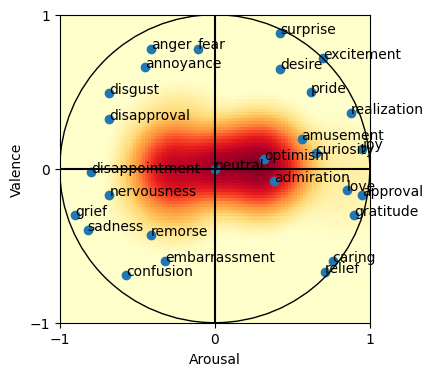

In [ ]:
#Saída do Heatmap
plt.figure(figsize=(4,4))

intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='YlOrRd') #https://matplotlib.org/stable/tutorials/colors/colormaps.html


#fig, ax = plt.subplots()
resp = list(teste['text_label'].apply(generate_coord, args = (emotions_coord,)))
temp = pd.DataFrame.from_records(resp, columns=['x', 'y'])

teste = pd.concat([teste, temp], axis=1)

teste = teste.reset_index(drop=True)

x_emo = emotions_coord.X.to_list()
y_emo = emotions_coord.Y.to_list()
plt.scatter(x_emo, y_emo)

for i, row in emotions_coord.iterrows():
  plt.annotate(row['Emotion'], (x_emo[i], y_emo[i]))

plt.xlim(-1, 1)
plt.ylim(-1,1)
plt.xticks([-1,1,0])
plt.yticks([-1,1,0])

ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1, color='black', fill=False))
plt.axvline(x = 0, color = 'black', label = 'Arousal')
plt.axhline(y = 0, color = 'black', label = 'Valence')

#plt.colorbar()
plt.xlabel('Arousal')
plt.ylabel('Valence')

plt.plot()

# Testando funcoes do pip

In [ ]:
!pip install transformers
!git clone https://github.com/unicamp-dl/Lite-T5-Translation.git
!pip install -r Lite-T5-Translation/requirements.txt
!pip install -U sentence-transformers
!pip install git+https://github.com/m-bain/whisperX.git
!pip install webvtt-py
!pip install --upgrade --no-cache-dir gdown
!pip install python-json-logger
!pip install deepface
!pip install opencv-python
!pip install ffmpeg-python

Cloning into 'Lite-T5-Translation'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 210 (delta 16), reused 0 (delta 0), pack-reused 168
Receiving objects: 100% (210/210), 35.97 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (24/24), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 744.8 kB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/8

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 891.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=8fe99ea0049e42cdbedd6eb87f5adf16a2a204f65933191bec22c0b77aba3833
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!git clone https://github.com/m3hrdadfi/soxan
!mv soxan/* .

Cloning into 'soxan'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 194 (delta 23), reused 22 (delta 22), pack-reused 170
Receiving objects: 100% (194/194), 3.63 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
#Outros videos para testar
#https://drive.google.com/file/d/1g3F-Go4c4hzZOdXMxxHfqnpVNZY1nEbH/view?usp=drive_link
#1nQpEHRYa8jyvpG1uOxPSaf7VCALHcMqN/view?usp=drive_link

In [ ]:
#Um dos arquivos vtt presentes no zip. Esse foi usado para gerar o exemplo abaixo
import gdown
url = "https://drive.google.com/file/d/1ZuKkFfxuVrH1jZm7qDShwq45d6xCXqdv/view?usp=drive_link"
output = "emotions.mp4"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1g3F-Go4c4hzZOdXMxxHfqnpVNZY1nEbH
To: /content/emotions.mp4
100%|██████████| 1.08M/1.08M [00:00<00:00, 107MB/s]


'emotions.mp4'

In [ ]:
import pandas as pd
import numpy as np
import math
import gdown
import matplotlib.pyplot as plt
import whisperx
import gc
import transformers
import webvtt
import os
import ffmpeg
import random
import logging
import torch
import torch.nn as nn
import torch.nn.functional as F
from moviepy.editor import *
import torchaudio
from sklearn.neighbors import kneighbors_graph
import networkx as nx
import cv2
import glob
import re
from sentence_transformers import SentenceTransformer
from deepface import DeepFace
from src.models import Wav2Vec2ForSpeechClassification, HubertForSpeechClassification
from transformers import AutoConfig, Wav2Vec2FeatureExtractor
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification

class VideoEmotionRecognition:
    def __init__(self, mp4):

        logging.basicConfig(filename="newfile.log",
        format='%(asctime)s %(message)s',filemode='w')
        self.logger = logging.getLogger()
        self.logger.setLevel(logging.INFO)

        self.logger.info("Initializing the class")

        self.dataframe = -1
        self.mp4 = mp4

        self.logger.info("Loading the arousal_valence map")

        url1 = 'https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH'
        output = 'emotions_coord.xlsx'
        gdown.download(url1, output, quiet=False)
        self.emotions_coord = pd.read_excel(output)

        self.logger.info("Successfully initialized")


    def transcript(self, method = "whisperx", min_time = 1):
        self.logger.info("Running the whisperx transcription")
        bashCommand = "whisperx --compute_type float32 --output_format vtt " + self.mp4
        os.system(bashCommand)
        self.logger.info("Successfully transcripted")

        self.logger.info("Generating the Dataframe from the vtt")
        self.set_vtt(self.mp4.replace("mp4", "vtt"))

        self.dataframe = self.dataframe[self.dataframe.apply(lambda x: time_diff(x[1], x[0]), axis=1) > min_time]
        self.dataframe.reset_index(inplace = True, drop = True)

        self.logger.info("Successfully generated the dataframe")

    def text(self, method = "RoBERTa-Go-Emotion"):
        if 'text_label' in self.dataframe.columns:
          self.logger.info("Text classification already done")
          return
        try:
          self.dataframe.size
          self.logger.info("Loading the translator")
          tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")

          model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

          pten_pipeline = pipeline('text2text-generation', model=model, tokenizer=tokenizer)

          self.logger.info("Successfully loaded, now applyng")
          self.dataframe['Translation'] = list(self.dataframe[2].apply(traduz, args = (pten_pipeline,)))

          self.logger.info("Loading the classifier")
          tokenizer = RobertaTokenizerFast.from_pretrained("bhadresh-savani/bert-base-go-emotion")
          model = TFRobertaForSequenceClassification.from_pretrained("bhadresh-savani/bert-base-go-emotion",from_pt=True)
          encoder_text = SentenceTransformer("bhadresh-savani/bert-base-go-emotion")

          emot_pipe = pipeline('sentiment-analysis',
                              model="bhadresh-savani/bert-base-go-emotion",
                              return_all_scores=True)

          self.logger.info("Successfully loaded, now applying")
          resp = list(self.dataframe['Translation'].apply(emocao_provavel, args = (emot_pipe,)))
          temp = pd.DataFrame.from_records(resp, columns=['text_label', 'text_prob'])
          self.dataframe["text_embeddings"] = list(self.dataframe['Translation'].apply(encoder_text_adj, args = (encoder_text,)))

          self.dataframe = pd.concat([self.dataframe, temp], axis=1)
          self.logger.info("Dataframe emotions classified")
        except AttributeError:
          raise ValueError("There is no transcription")

    def audio(self, method = "Rajaram1996/Hubert_emotion"):
        if 'audio_label' in self.dataframe.columns:
          self.logger.info("Audio classification already done")
          return

        model_name_or_path = method

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        config = AutoConfig.from_pretrained(model_name_or_path)
        feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name_or_path)
        sampling_rate = feature_extractor.sampling_rate


        audio_model = HubertForSpeechClassification.from_pretrained(model_name_or_path, output_hidden_states=True).to(device)
        video = VideoFileClip(self.mp4)

        emot = []
        scor = []
        embeddings = []
        maximo = self.dataframe.shape[0]

        self.logger.info("Running the Hubert classification for each phrase")

        for i in range(0, maximo):
            #Usando os timestamps da transcricao, corto o audio separando cada frase
            startPos = self.dataframe[0][i]
            endPos = self.dataframe[1][i]

            clip = video.subclip(startPos, endPos)

            part_name = "part_"+str(i)+".mp3"
            clip.audio.write_audiofile(part_name, verbose=False)

            #Aplico o modelo
            temp = predict(part_name,sampling_rate, device, config, feature_extractor, audio_model)
            embeddings.append(encoder_audio(part_name,sampling_rate, device, feature_extractor, audio_model))

            max_values = max(temp, key=lambda x:x['Score'])

            # A cada frase, atribuo a emocao mais provavel e sua probabilidade
            max_emotion = (max_values['Emotion'])
            max_emotion = max_emotion[(max_emotion.find('_')+ 1):]
            if max_emotion == 'sad':
              max_emotion = 'sadness'
            elif max_emotion == 'angry':
              max_emotion = 'anger'
            elif max_emotion == 'happy':
              max_emotion = 'joy'
            emot.append(max_emotion)

            max_score = (max_values['Score'])
            scor.append(float(max_score.replace("%","",1))/ 100)

            os.remove(part_name)
            i += 1

        self.dataframe['audio_label'] = emot
        self.dataframe['audio_prob'] = scor
        self.dataframe['audio_embeddings'] = embeddings

        self.logger.info("Successfully generated the dataframe")

    def video(self, frames = 5 ):
      if 'video_label' in self.dataframe.columns:
          self.logger.info("Video classification already done")
          return
      video = VideoFileClip(self.mp4)
      face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

      new_clip = video.set_fps(frames)
      emot = []
      scor = []
      maximo = self.dataframe.shape[0]

      for i in range(0, maximo):
          #Usando os timestamps da transcricao, corot o audio separando cada frase
          startPos = self.dataframe[0][i]
          endPos = self.dataframe[1][i]

          clip = new_clip.subclip(startPos, endPos)

          frames = clip.iter_frames()

          total = {}
          quant = 0

          for frame in frames:

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(gray, 1.1, 4)
            #Se não tiver face, essa função uma tupla vazia

            if(len(faces) > 0):
              try:
                #Se não tiver face, essa função retorna uma excecao
                objs = DeepFace.analyze(frame, actions = ['emotion'])
                if(total == {}):
                  total = objs[0]['emotion']
                else:
                  for key, value in objs[0]['emotion'].items():
                    total[key] += value
                quant += 1
              except ValueError:
                continue
          for key, value in total.items():
            total[key] = value / quant
          if(quant == 0):
            emot.append("no_face")
            scor.append(0)
          else:
            max_prob = max(total.values())
            max_emo = {i for i in total if total[i] == max_prob}

            #Max emo eh um set, converto para o formato certo em str
            max_emo = str(max_emo)
            max_emo = str(max_emo[2: -2])
            max_emo

            if max_emo == 'sad':
              max_emo = 'sadness'
            elif max_emo == 'angry':
              max_emo = 'anger'
            elif max_emo == 'happy':
              max_emo = 'joy'
            emot.append(max_emo)
            scor.append(max_prob/(quant * 100))

      self.dataframe['video_label'] = emot
      self.dataframe['video_prob'] = scor

    def emotion_recognition(self, modality, text_method = "RoBERTa-Go-Emotion", audio_method = "Rajaram1996/Hubert_emotion", video_frames = 5):
      #Primeiro, verifica se ja existe uma transcricao
      try:
        maximo = self.dataframe.shape[0]
      except AttributeError:
        self.logger.info("No transcript found, generating one first")
        self.transcript()
        maximo = self.dataframe.shape[0]

      if(modality == "transcript"):

        self.logger.info("Initialzing the transcription")
        self.text(text_method)

        self.logger.info("Ending the transcription")

      elif(modality == "audio"):

        self.logger.info("Initialzing the audio classification")
        self.audio(audio_method)

        self.logger.info("Ending the audio classification")

      elif(modality == "video"):

        self.logger.info("Initialzing the video classification")
        self.video(video_frames)

        self.logger.info("Ending the video classification")

      elif(modality == "multimodal"):
        self.logger.info("Initialzing the transcription")
        self.text(text_method)
        self.logger.info("Ending the transcription")

        self.logger.info("Initialzing the audio classification")
        self.audio(audio_method)
        self.logger.info("Ending the audio classification")

        self.logger.info("Generating the graph")

        A_text = kneighbors_graph(np.array(self.dataframe.text_embeddings.to_list()), 2, mode='connectivity')
        G_text = nx.Graph(A_text.toarray())

        A_audio = kneighbors_graph(np.array(self.dataframe.audio_embeddings.to_list()), 2, mode='connectivity')
        G_audio = nx.Graph(A_audio.toarray())

        self.G_multimodal = nx.Graph()
        for edge in G_text.edges(): self.G_multimodal.add_edge(edge[0],edge[1])
        for edge in G_audio.edges(): self.G_multimodal.add_edge(edge[0],edge[1])

        t = []
        for index,row in self.dataframe.iterrows():
          df_coord_text = generate_coord(row["text_label"],self.emotions_coord)
          coord_text = [float(df_coord_text[0]),float(df_coord_text[1])]
          self.G_multimodal.nodes[index]['text'] = np.array(coord_text)

          df_coord_audio = generate_coord(row["audio_label"],self.emotions_coord)
          coord_audio = [float(df_coord_audio[0]),float(df_coord_audio[1])]
          self.G_multimodal.nodes[index]['audio'] = np.array(coord_audio)

          t.append(np.linalg.norm(self.G_multimodal.nodes[index]['audio']-self.G_multimodal.nodes[index]['text']))

        for index,row in self.dataframe.iterrows():
          self.G_multimodal.nodes[index]['pseudolabeling'] = 1.0 - (t[index]/np.max(t))

        self.logger.info("Ending the multimodal classification")


    def set_vtt(self, arquivo):
        self.logger.info("Loading dataframe via vtt")
        L = []

        for caption in webvtt.read(arquivo):
            L.append([caption.start,caption.end,str(caption.text)])

        self.dataframe = pd.DataFrame(L)
        self.logger.info("Successfully loaded")

    def get_labels(self, modality = "all"):
        if(modality == "transcript"):
          self.dataframe["label"] = self.dataframe["text_label"]
          self.dataframe["prob"] = self.dataframe["text_prob"]
          return self.dataframe[[0,1,2,'label','prob']]
        elif(modality == "audio"):
          self.dataframe["label"] = self.dataframe["audio_label"]
          self.dataframe["prob"] = self.dataframe["audio_prob"]
          return self.dataframe[[0,1,2,'label','prob']]
        elif(modality == "video"):
          self.dataframe["label"] = self.dataframe["video_label"]
          self.dataframe["prob"] = self.dataframe["video_prob"]
          return self.dataframe[[0,1,2,'label','prob']]
        return self.dataframe

    def get_heatmap(self, modality = 'all', animated = False, window = 60, stride = 10, join_video = False):

        if modality == 'multimodal':
          x = []
          y = []
          GCP(self.G_multimodal,mi=1,audio_weight=0.4, text_weight=0.6,max_iter=30)
          for index in self.dataframe.index:
            v = self.G_multimodal.nodes[index]['f']
            if animated == True or (np.abs(v[0]) > 0.1 or np.abs(v[1]) > 0.1):
              x.append(v[0])
              y.append(v[1])
        else:
          df = self.get_labels(modality)

          self.logger.info("Adding the arousal valence coordinates")
          df.loc[df['label'] == 'no_face', ['label']] = 'neutral'
          resp = list(df['label'].apply(generate_coord, args = (self.emotions_coord,)))
          temp = pd.DataFrame.from_records(resp, columns=['x', 'y'])

          df = pd.concat([df, temp], axis=1)
          if animated == False:
              df = df[df.label!='neutral']
              df = df.reset_index(drop=True)

          array_x = df['x'].to_numpy()
          x = array_x.tolist()
          array_y = df['y'].to_numpy()
          y = array_y.tolist()

        if animated == True:
            self.logger.info("Generating images for the video")
            os.mkdir("tempjpgs")
            clip = VideoFileClip(self.mp4)

            maximo = clip.duration
            ini = 0
            fim = window
            atual = 1

            while(1):
                id_ini = np.where(self.dataframe[0].apply(to_seconds) >= ini)[0][0]
                id_fim = np.where(self.dataframe[0].apply(to_seconds) <= fim)[0][-1]

                x_temp = np.array(x[id_ini: id_fim + 1])
                y_temp = np.array(y[id_ini: id_fim + 1])

                if all(val == 0 for val in x_temp) and all(val == 0 for val in y_temp):
                  x_temp = np.array([0])
                  y_temp = np.array([0])
                else:
                  x_temp = [i for i,j in zip(x_temp,y_temp) if (i != 0 and j != 0)]
                  y_temp = [j for i,j in zip(x[id_ini: id_fim + 1],y_temp) if (i != 0 and j != 0)]

                plot_heatmap(x_temp, y_temp, self.emotions_coord, "animated")
                plt.title("Emotions from " + str(ini) + " to " + str(fim) + " seconds")
                plt.savefig("tempjpgs/output" + str(atual) + ".jpg")
                plt.close()
                if fim > maximo:
                  break
                ini += stride
                fim += stride
                atual += 1
            self.logger.info("Done generating images")

            self.logger.info("Creating Video")
            img_array = []
            for filename in sorted(glob.glob('tempjpgs/*.jpg') , key=numericalSort):
                img = cv2.imread(filename)
                height, width, layers = img.shape
                size = (width,height)
                img_array.append(img)
                os.remove(filename)

            os.rmdir("tempjpgs")

            clip = VideoFileClip(self.mp4)
            value = clip.size
            rate = 1 + (clip.fps - 1 ) *join_video
            out = cv2.VideoWriter('heatmap.mp4',cv2.VideoWriter_fourcc(*'XVID'), rate, size)


            if join_video == True:

              rate = int(rate)
              tam =  window
              count = 0
              duration = int(clip.duration)
              duration *= rate

              for i in range(len(img_array)):
                for j in range(rate * tam):
                  if count >= duration:
                    break
                  out.write(img_array[i])
                  count += 1
                tam = stride
              while count < duration:
                out.write(img_array[-1])
                count += 1

            else:
              for i in range(len(img_array)):
                for j in range(2):
                  out.write(img_array[i])

            out.release()

            myvideo = VideoFileClip('heatmap.mp4')
            self.logger.info("Video created")

            if join_video == True:
              self.logger.info("Joining Videos")

              flag = 0

              bashCommand = "ffmpeg -y -i heatmap.mp4 -f lavfi -i anullsrc -vcodec copy -acodec aac -shortest theatmap.mp4"
              flag += os.system(bashCommand)

              bashCommand = "ffmpeg -y -i theatmap.mp4 -filter:v scale=" + str(value[0]) + ":" + str(value[1]) + " sheatmap.mp4"
              flag += os.system(bashCommand)

              bashCommand = "ffmpeg -y -i " + self.mp4 + " -i sheatmap.mp4 -filter_complex \"[0][1]scale2ref=\'oh*mdar\':\'if(lt(main_h,ih),ih,main_h)\'[0s][1s];[1s][0s]scale2ref=\'oh*mdar\':\'if(lt(main_h,ih),ih,main_h)\'[1s][0s];[0s][1s]hstack,setsar=1; [0:a][1:a]amerge[a]\" -map \"[a]\" -ac 2 video_with_heatmap.mp4"
              flag += os.system(bashCommand)

              if(flag == 0):
                self.logger.info("Videos successufully joined")
              else:
                self.logger.info("Error detected joining videos")

              return

            return ipython_display(myvideo)


        else:
          plot_heatmap(x, y, self.emotions_coord, modality)

#Funcoes auxiliares para classifcar quanto as emocoes

def traduz(frase, pten_pipeline):
    traducao = pten_pipeline(frase)
    traducao = list(traducao[0].values())
    return traducao[0]

    #Função para extrair do dicionario retornado pelo goemotions a emoção mais provável e sua probabilidade
def emocao_provavel(frase, emot_pipe):
    emotion_labels = emot_pipe(frase)

    maximo = emotion_labels[0][0]["score"]
    emocao = emotion_labels[0][0]["label"]

    for dict in emotion_labels[0]:
        if dict["score"] > maximo:
          maximo = dict["score"]
          emocao = dict["label"]

    return emocao, maximo

#Funcoes auxiliares para gerar o heatmap

numbers = re.compile(r"(\d+)")
def numericalSort(value):
  parts = numbers.split(value)
  parts[1::2] = map(int, parts[1::2])
  return parts
def generate_coord(label, coords):
    index = coords.loc[coords['Emotion'] == label].index[0]
    x = coords.iloc[index]['X']
    y = coords.iloc[index]['Y']
    return (x,y)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P
def plot_heatmap(x, y, emotions_coord, modality):
    #Definindo tamanho do grid e do raio(h)
    grid_size=0.02
    h=0.5

    #Tomando valores de máximos e mínimos de X e Y.
    x_min=-1
    x_max=1
    y_min=-1
    y_max=1

    #Construindo grid
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #Determinando ponto central do grid
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #Calculando distância
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2)
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #Soma os valores de intensidade
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #Saída do Heatmap
    plt.figure(figsize=(7,7))

    intensity=np.array(intensity_list)
    plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='YlOrRd') #https://matplotlib.org/stable/tutorials/colors/colormaps.html


    #fig, ax = plt.subplots()

    x_emo = emotions_coord.X.to_list()
    y_emo = emotions_coord.Y.to_list()
    plt.scatter(x_emo, y_emo)


    for i, row in emotions_coord.iterrows():
        plt.annotate(row['Emotion'], (x_emo[i], y_emo[i]))

    plt.xlim(-1, 1)
    plt.ylim(-1,1)

    ax = plt.gca()
    ax.add_patch(plt.Circle((0, 0), 1, color='black', fill=False))
    plt.axvline(x = 0, color = 'black', label = 'Arousal')
    plt.axhline(y = 0, color = 'black', label = 'Valence')

    #plt.colorbar()

    plt.plot(x,y,'x',color='white')

#Funcoes auxiliares para a transcricao

def time_diff(fim, init):

      time_fim = to_seconds(fim)
      time_init = to_seconds(init)

      return time_fim - time_init

def speech_file_to_array_fn(path, sampling_rate):
    speech_array, _sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(_sampling_rate, sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def encoder_text_adj(sentence, encoder):
    return encoder.encode([sentence])[0]

#Funcoes auxiliares para a funcionalidade audio

def predict(path, sampling_rate, device, config, feature_extractor, model):
    speech = speech_file_to_array_fn(path, sampling_rate)
    inputs = feature_extractor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)
    inputs = {key: inputs[key].to(device) for key in inputs}

    with torch.no_grad():
        logits = model(**inputs).logits

    scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]
    outputs = [{"Emotion": config.id2label[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in
               enumerate(scores)]
    return outputs

    # extrai os embeddings da predição feita
def encoder_audio(path, sampling_rate, device, feature_extractor, model, mean_pool=True):
    speech = speech_file_to_array_fn(path, sampling_rate)
    inputs = feature_extractor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)
    inputs = {key: inputs[key].to(device) for key in inputs}

    with torch.no_grad():
        out = model(**inputs).hidden_states[-1]
        if mean_pool:
            return np.array(torch.mean(out, dim=1).cpu())[0]
        else:
            return np.array(out.cpu())[0]
#Funcoes auxiliares para a funcionalidade multimodal
def GCP(G, max_iter=100, audio_weight=0.2, text_weight=0.8, mi=1, min_diff=0.05):

  # inicializando
  L_nodes = []
  for n in G.nodes():
    G.nodes[n]['f'] = np.average([G.nodes[n]['text'],G.nodes[n]['audio']],axis=0,weights=[text_weight, audio_weight])
    L_nodes.append(n)


  for i in range(0,max_iter):
    random.shuffle(L_nodes)

    # propagando
    diff = 0
    for node in L_nodes:

      f_new = np.array([0.0, 0.0])
      count = 0
      for neighbor in G.neighbors(node):
        f_new += G.nodes[neighbor]['f']
        count += 1

      f_new /= count

      f_pseudolabeling = np.average([G.nodes[node]['text'],G.nodes[node]['audio']],axis=0,weights=[text_weight, audio_weight])
      pl = G.nodes[node]['pseudolabeling']*mi
      f_new = f_pseudolabeling*pl + f_new*(1-pl)
      diff += np.linalg.norm(G.nodes[node]['f']-f_new)
      G.nodes[node]['f']=f_new


    print("Iteration #"+str(i+1)+" Q(F)="+str(diff))
    if diff <= min_diff: break

#Funcoes uteis
def to_seconds(horario):

  horario_separado = horario.split(":")
  seconds = 3600*int(horario_separado[0]) + 60*int(horario_separado[1]) + float(horario_separado[2])

  return seconds

In [ ]:
viemr = VideoEmotionRecognition("emotions.mp4")

INFO:root:Initializing the class
INFO:root:Loading the arousal_valence map
Downloading...
From: https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH
To: /content/emotions_coord.xlsx
100%|██████████| 8.77k/8.77k [00:00<00:00, 13.9MB/s]
INFO:root:Successfully initialized


In [ ]:
viemr.dataframe = df

In [ ]:
clip = VideoFileClip("emotions.mp4")
value = clip.size
value

[1280, 720]

In [ ]:
!ffmpeg -i sheatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i theatmap.mp4 -filter:v scale=1280:720 sheatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0:v][1:v]hstack=inputs=2[v]; [0:a][1:a]amerge[a]" -map "[v]" -map "[a]" -ac 2 video_with_heatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffprobe -v error -show_entries stream=width,height -of default=noprint_wrappers=1 sheatmap.mp4

width=1280
height=720


In [ ]:
!ffprobe emotions.mp4

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [ ]:
!ffmpeg -y -i emotions.mp4 -vf scale=1280:-1 emotions_resized.mp4
!ffmpeg -y -i sheatmap.mp4 -vf scale=1280:-1 sheatmap_resized.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffprobe theatmap.mp4

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0:v]scale=640:-1[v0];[v0][1:v]vstack=inputs=2[v]; [0:a][1:a]amerge[a]"  -map "[v]" -map "[a]" -ac 2 video_with_heatmap.mp4

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0][1]scale2ref='oh*mdar':'if(lt(main_h,ih),ih,main_h)'[0s][1s];[1s][0s]scale2ref='oh*mdar':'if(lt(main_h,ih),ih,main_h)'[1s][0s];[0s][1s]hstack,setsar=1; [0:a][1:a]amerge[a]" -map "[a]" -ac 2  output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i heatmap.mp4 -filter:v scale=-1:720 aheatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i emotions.mp4 -filter:v scale=-1:720 aemotions.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i aemotions.mp4 -i aheatmap.mp4 -filter_complex "[0:v] [1:v] hstack=inputs=2 [outv]" -map "[outv]" -map 0:a output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0:v]scale=640:-1[v0];[v0][1:v]vstack=inputs=2[v]; [0:a][1:a]amerge[a]"  -map "[v]" -map "[a]" -ac 2 video_with_heatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0:v][1:v]hstack=inputs=2[v]; [0:a][1:a]amerge[a]" -map "[v]" -map "[a]" -ac 2 video_with_heatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffprobe emotions.mp4

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [ ]:
!ffprobe sheatmap.mp4

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [ ]:
!ffmpeg -y -i emotions.mp4 -i sheatmap.mp4 -filter_complex "[0:v][1:v]hstack=inputs=2[v]; [0:a][1:a]amerge[a]" -map "[v]" -map "[a]" -ac 2 video_with_heatmap.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
viemr.get_heatmap(modality = "transcript", animated = True, join_video = True) # retorna o mapa de calor

INFO:root:Adding the arousal valence coordinates


In [ ]:
viemr.transcript(method="whisperx")  # gera a transcrição https://github.com/m-bain/whisperX

INFO:root:Running the whisperx transcription
INFO:root:Successfully transcripted
INFO:root:Generating the Dataframe from the vtt
INFO:root:Loading dataframe via vtt
INFO:root:Successfully loaded
INFO:root:Successfully generated the dataframe


In [ ]:
viemr.emotion_recognition(modality="transcript")

INFO:root:Initialzing the transcription
INFO:root:Loading the translator
INFO:root:Successfully loaded, now applyng
INFO:root:Loading the classifier
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'RobertaTokenizerFast'.
You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.11.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.9.attention.self.query.weight', 'bert.embeddings.wor

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:Dataframe emotions classified
INFO:root:Ending the transcription


In [ ]:
viemr.get_labels(modality="transcript")

0             1  \
0   00:00:19.764  00:00:27.776   
1   00:00:27.776  00:00:30.640   
2   00:00:30.640  00:00:34.726   
3   00:00:39.275  00:00:42.279   
4   00:00:42.279  00:00:43.801   
..           ...           ...   
59  00:04:29.162  00:04:34.605   
60  00:04:35.466  00:04:38.007   
61  00:04:40.098  00:04:43.240   
62  00:04:43.240  00:04:52.325   
63  00:04:52.325  00:04:59.289   

                                                    2  \
0   Eu queria que a gente começasse que você me di...   
1                 Meu nome é Antônio Rodrigues Filho.   
2   Eu nasci na cidade de São Paulo, na zona leste...   
3   Eu falei assim, não, essa pausa realmente marc...   
4                                    A minha própria.   
..                                                ...   
59  Aí eu comecei a pegar essa fórmula de música p...   
60   Isso daqui, quando eu voltei da França, em 1990.   
61  que eu voltei da França, que eu vi isso lá, en...   
62  Eu vi que estava surgindo esse movimento music...   
63  Então eu fui um dos pioneiros do reggae a faze...   

                                          Translation  \
0   I wanted that we started to tell me the full name   
1                 My name is Antônio Rodrigues Filho.   
2   I was born in the city of São Paulo, in the ea...   
3      I said that, no, this pause really marked deep   
4                                             My own.   
..                                                ...   
59    Then I started to get this music formula poems.   
60       This is when I returned from France in 1990.   
61  I went back from France, I saw this there, you...   
62  I saw that there was a rise in this musical mo...   
63  So I was one of the pioneers of reggae to make...   

                                      text_embeddings   text_label  text_prob  
0   [-0.88883173, -1.0581212, -0.49855962, -0.7591...       desire   0.419759  
1   [-2.1943994, 0.11553991, 0.583228, 0.3475573, ...      neutral   0.276926  
2   [-1.4117076, 1.7614739, 1.1421529, 0.35156325,...      neutral   0.285252  
3   [-1.005281, 1.2353216, 1.0596553, 0.1469509, -...  disapproval   0.329000  
4   [-1.6960052, -0.786462, 1.1460322, 0.44890538,...      neutral   0.810805  
..                                                ...          ...        ...  
59  [-1.8865519, -0.57885665, 0.40896368, 0.068196...      neutral   0.818022  
60  [-0.9619932, 0.3335075, 0.5648592, 0.18794674,...      neutral   0.459435  
61  [-1.2587575, 0.02587196, 0.33259392, 0.0613997...      neutral   0.820750  
62  [-2.0844364, 0.445429, 0.63722515, 0.089831114...      neutral   0.465019  
63  [-1.077328, 0.21817245, 1.0369421, 0.048939075...      neutral   0.170055  

[64 rows x 7 columns]

In [ ]:
viemr.emotion_recognition(modality="audio")

INFO:root:Initialzing the audio classification


INFO:root:Running the Hubert classification for each phrase


MoviePy - Writing audio in part_0.mp3


MoviePy - Done.
MoviePy - Writing audio in part_1.mp3


MoviePy - Done.
MoviePy - Writing audio in part_2.mp3


MoviePy - Done.
MoviePy - Writing audio in part_3.mp3


MoviePy - Done.


MoviePy - Writing audio in part_4.mp3


MoviePy - Done.


MoviePy - Writing audio in part_5.mp3


MoviePy - Done.
MoviePy - Writing audio in part_6.mp3


MoviePy - Done.


MoviePy - Writing audio in part_7.mp3


MoviePy - Done.
MoviePy - Writing audio in part_8.mp3


MoviePy - Done.
MoviePy - Writing audio in part_9.mp3


MoviePy - Done.
MoviePy - Writing audio in part_10.mp3


MoviePy - Done.


MoviePy - Writing audio in part_11.mp3


MoviePy - Done.


MoviePy - Writing audio in part_12.mp3


MoviePy - Done.


MoviePy - Writing audio in part_13.mp3


MoviePy - Done.


MoviePy - Writing audio in part_14.mp3


MoviePy - Done.


MoviePy - Writing audio in part_15.mp3


MoviePy - Done.


MoviePy - Writing audio in part_16.mp3


MoviePy - Done.
MoviePy - Writing audio in part_17.mp3


MoviePy - Done.
MoviePy - Writing audio in part_18.mp3


MoviePy - Done.


MoviePy - Writing audio in part_19.mp3


MoviePy - Done.


MoviePy - Writing audio in part_20.mp3


MoviePy - Done.
MoviePy - Writing audio in part_21.mp3


MoviePy - Done.
MoviePy - Writing audio in part_22.mp3


MoviePy - Done.


MoviePy - Writing audio in part_23.mp3


MoviePy - Done.


MoviePy - Writing audio in part_24.mp3


MoviePy - Done.
MoviePy - Writing audio in part_25.mp3


MoviePy - Done.


MoviePy - Writing audio in part_26.mp3


MoviePy - Done.


MoviePy - Writing audio in part_27.mp3


MoviePy - Done.


MoviePy - Writing audio in part_28.mp3


MoviePy - Done.


MoviePy - Writing audio in part_29.mp3


MoviePy - Done.


MoviePy - Writing audio in part_30.mp3


MoviePy - Done.


MoviePy - Writing audio in part_31.mp3


MoviePy - Done.


MoviePy - Writing audio in part_32.mp3


MoviePy - Done.


MoviePy - Writing audio in part_33.mp3


MoviePy - Done.


MoviePy - Writing audio in part_34.mp3


MoviePy - Done.


MoviePy - Writing audio in part_35.mp3


MoviePy - Done.
MoviePy - Writing audio in part_36.mp3


MoviePy - Done.


MoviePy - Writing audio in part_37.mp3


MoviePy - Done.


MoviePy - Writing audio in part_38.mp3


MoviePy - Done.


MoviePy - Writing audio in part_39.mp3


MoviePy - Done.


MoviePy - Writing audio in part_40.mp3


MoviePy - Done.


MoviePy - Writing audio in part_41.mp3


MoviePy - Done.


MoviePy - Writing audio in part_42.mp3


MoviePy - Done.


MoviePy - Writing audio in part_43.mp3


MoviePy - Done.


MoviePy - Writing audio in part_44.mp3


MoviePy - Done.


MoviePy - Writing audio in part_45.mp3


MoviePy - Done.


MoviePy - Writing audio in part_46.mp3


MoviePy - Done.


MoviePy - Writing audio in part_47.mp3


MoviePy - Done.


MoviePy - Writing audio in part_48.mp3


MoviePy - Done.


MoviePy - Writing audio in part_49.mp3


MoviePy - Done.
MoviePy - Writing audio in part_50.mp3


MoviePy - Done.
MoviePy - Writing audio in part_51.mp3


MoviePy - Done.


MoviePy - Writing audio in part_52.mp3


MoviePy - Done.


MoviePy - Writing audio in part_53.mp3


MoviePy - Done.
MoviePy - Writing audio in part_54.mp3


MoviePy - Done.


MoviePy - Writing audio in part_55.mp3


MoviePy - Done.


MoviePy - Writing audio in part_56.mp3


MoviePy - Done.
MoviePy - Writing audio in part_57.mp3


MoviePy - Done.


MoviePy - Writing audio in part_58.mp3


MoviePy - Done.


MoviePy - Writing audio in part_59.mp3


MoviePy - Done.
MoviePy - Writing audio in part_60.mp3


MoviePy - Done.


MoviePy - Writing audio in part_61.mp3


MoviePy - Done.


MoviePy - Writing audio in part_62.mp3


MoviePy - Done.
MoviePy - Writing audio in part_63.mp3


INFO:root:Successfully generated the dataframe
INFO:root:Ending the audio classification


MoviePy - Done.


In [ ]:
viemr.get_labels(modality="audio")

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
4   00:00:42.285  00:00:43.806   
..           ...           ...   
59  00:04:29.168  00:04:33.612   
60  00:04:33.612  00:04:35.473   
61  00:04:40.175  00:04:43.118   
62  00:04:43.118  00:04:52.327   
63  00:04:52.327  00:04:59.233   

                                                    2    label   prob  
0   Eu queria que a gente começasse que você me di...  sadness  0.936  
1                 Meu nome é Antônio Rodrigues Filho.  sadness  0.641  
2   Eu nasci na cidade de São Paulo, na zona leste...  sadness  0.967  
3   Eu falei assim, não, essa paese realmente me m...  sadness  0.941  
4                                    A minha própria.  neutral  0.983  
..                                                ...      ...    ...  
59  Aí eu comecei a pegar essa fórmula de música p...  sadness  0.705  
60                               Isso foi em que ano?  sadness  0.820  
61  que eu voltei da França, que eu vi isso lá, en...      joy  0.803  
62  Eu vi que estava surgindo esse movimento music...      joy  0.982  
63  Então eu fui um dos pioneiros do reggae a faze...  disgust  0.800  

[64 rows x 5 columns]

In [ ]:
viemr.set_vtt("emotions.vtt")

INFO:root:Loading dataframe via vtt
INFO:root:Successfully loaded


In [ ]:
viemr.emotion_recognition(modality="video")

INFO:root:Initialzing the video classification
Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.17it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.59it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.64it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.33it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.59it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.91it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.87it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.76it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.65it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.43it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


Total existe


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
INFO:root:Ending the video classification


In [ ]:
viemr.get_labels(modality="video")

0             1  \
0   00:00:19.748  00:00:27.774   
1   00:00:27.774  00:00:30.636   
2   00:00:30.636  00:00:34.779   
3   00:00:34.779  00:00:42.285   
5   00:00:43.806  00:00:47.609   
..           ...           ...   
59  00:04:29.168  00:04:33.612   
60  00:04:33.612  00:04:35.473   
61  00:04:40.175  00:04:43.118   
62  00:04:43.118  00:04:52.327   
63  00:04:52.327  00:04:59.233   

                                                    2  \
0   Eu queria que a gente começasse que você me di...   
1                 Meu nome é Antônio Rodrigues Filho.   
2   Eu nasci na cidade de São Paulo, na zona leste...   
3   Eu falei assim, não, essa paese realmente me m...   
5   Quando eu fiz uma homenagem ao meu tempo de cr...   
..                                                ...   
59  Aí eu comecei a pegar essa fórmula de música p...   
60                               Isso foi em que ano?   
61  que eu voltei da França, que eu vi isso lá, en...   
62  Eu vi que estava surgindo esse movimento music...   
63  Então eu fui um dos pioneiros do reggae a faze...   

                                          Translation    label      prob  
0   I wanted that we started to tell me the full name      joy  0.087243  
1                 My name is Antônio Rodrigues Filho.     fear  0.210100  
2   I was born in the city of São Paulo, in the ea...      joy  0.203329  
3          I said so, no, this paese really marked me     fear  0.036184  
5        When I made a tribute to my time as a child.  sadness  0.041253  
..                                                ...      ...       ...  
59    Then I started to get this music formula poems.    anger  0.072733  
60           That was when what year did this happen?    anger  0.045731  
61  I went back from France, I saw this there, you...    anger  0.974772  
62  I saw that there was a rise in this musical mo...    anger  0.140121  
63  So I was one of the pioneers of reggae to make...     fear  0.022557  

[63 rows x 6 columns]

In [ ]:
viemr.get_heatmap(modality = "transcript", animated = True, join_video = True, window = 10, stride = 5) # retorna o mapa de calor

INFO:root:Adding the arousal valence coordinates


TypeError: ignored

In [ ]:
viemr.get_heatmap(modality = "audio", animated = True) # retorna o mapa de calor

INFO:root:Adding the arousal valence coordinates


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
viemr.get_heatmap(modality = "multimodal", animated = True) # retorna o mapa de calor

Iteration #1 Q(F)=8.68309452609867
Iteration #2 Q(F)=1.3142046191844703
Iteration #3 Q(F)=0.32768785071406425
Iteration #4 Q(F)=0.09199454515288376
Iteration #5 Q(F)=0.023959030013469315
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
viemr.emotion_recognition(modality="multimodal")

INFO:root:Initialzing the transcription
INFO:root:Text classification already done
INFO:root:Ending the transcription
INFO:root:Initialzing the audio classification
INFO:root:Audio classification already done
INFO:root:Ending the audio classification
INFO:root:Generating the graph
INFO:root:Ending the multimodal classification


Iteration #1 Q(F)=8.640758595282165
Iteration #2 Q(F)=1.383228978733688
Iteration #3 Q(F)=0.31811969808864216
Iteration #4 Q(F)=0.07598322828782876
Iteration #5 Q(F)=0.028176036798329356


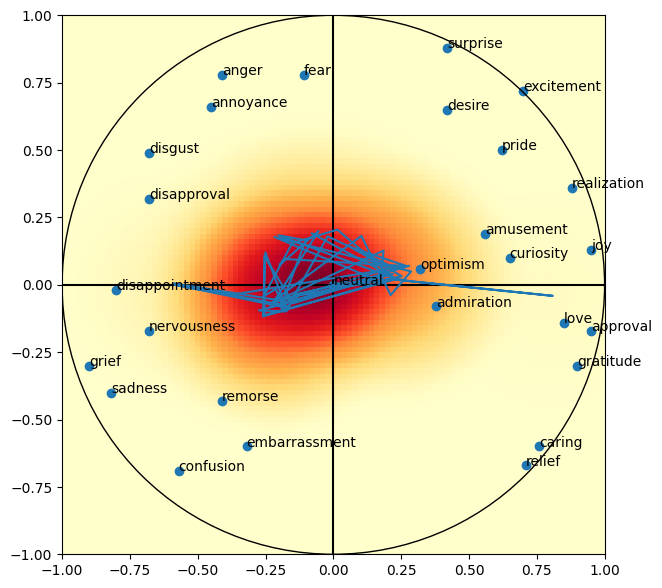

In [ ]:
viemr.get_heatmap(modality = "multimodal")